In [1]:
from netCDF4 import Dataset
import numpy as np
from mpl_toolkits.basemap import Basemap

In [3]:
file = '/home/raul/TFM/Data/CHELSA/CHELSA_pr_1981-2010_V.2.1.nc' # mention the path to the downloaded file
data = Dataset(file, mode='r') # read the data 
print(type(data)) # print the type of the data 
print(data.variables.keys()) # print the variables in the data

<class 'netCDF4._netCDF4.Dataset'>
dict_keys(['crs', 'lon', 'lat', 'time (month)', 'pr'])


In [6]:
lats = data.variables['lat'][:]  
longs = data.variables['lon'][:]
time = data.variables['time (month)'][:]

tave = data.variables['pr'][:]

In [9]:
mp = Basemap(projection='merc',
             llcrnrlon=68.42,   # lower longitude
             llcrnrlat=7.45,    # lower latitude
             urcrnrlon=99.98,   # uppper longitude
             urcrnrlat=37.78,   # uppper latitude
            resolution = 'i')
mp

In [10]:
lat,long = 60.362929, 5.581795

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap


TypeError: Dimensions of C (4176, 8640) should be one smaller than X(1) and Y(4176) while using shading='flat' see help(pcolor)

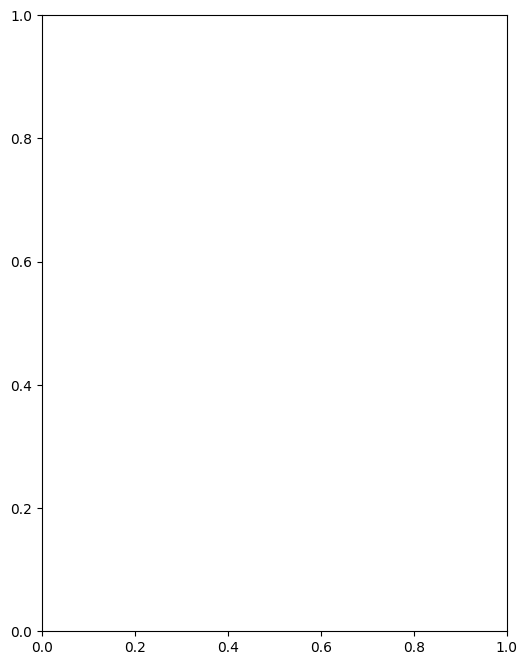

In [16]:
lon, lat = np.meshgrid(long,lats)  #this converts coordinates into 2D arrray
x,y = mp(lon,lat) #mapping them together 
plt.figure(figsize=(6,8)) #figure size 
c_scheme = mp.pcolor(x,y,np.squeeze(tave[0,:,:]),cmap = 'jet') # [0,:,:] is for the first day of the year

# consider this as the outline for the map that is to be created 
mp.drawcoastlines()
mp.drawstates()
mp.drawcountries()

cbar = mp.colorbar(c_scheme,location='right',pad = '10%') # map information
plt.title('Average Temperature for: Day 1 of year 2019')
plt.show()

plt.savefig('tave.jpg',dpi=300) #saves the image generated

## Segundo intento

In [20]:
import xarray as xr # For working with NetCDF files as xarray objects

xrds = xr.open_dataset(file)
xrds

<xarray.Dataset> Size: 2GB
Dimensions:       (lon: 8640, lat: 4176, time (month): 12)
Coordinates:
  * lon           (lon) float64 69kB -180.0 -180.0 -179.9 ... 179.9 179.9 180.0
  * lat           (lat) float64 33kB 83.96 83.92 83.88 ... -89.91 -89.95 -90.0
  * time (month)  (time (month)) int32 48B 1 2 3 4 5 6 7 8 9 10 11 12
Data variables:
    crs           int32 4B ...
    pr            (time (month), lat, lon) float32 2GB ...
Attributes:
    Conventions:  CF-1.4
    created_by:   R, packages ncdf4 and raster (version 3.3-13)
    date:         2021-06-03 17:27:12

In [21]:
xrds.attrs

{'Conventions': 'CF-1.4',
 'created_by': 'R, packages ncdf4 and raster (version 3.3-13)',
 'date': '2021-06-03 17:27:12'}

In [22]:
xrds.dims

FrozenMappingWarningOnValuesAccess({'lon': 8640, 'lat': 4176, 'time (month)': 12})

In [23]:
xrds.coords

Coordinates:
  * lon           (lon) float64 69kB -180.0 -180.0 -179.9 ... 179.9 179.9 180.0
  * lat           (lat) float64 33kB 83.96 83.92 83.88 ... -89.91 -89.95 -90.0
  * time (month)  (time (month)) int32 48B 1 2 3 4 5 6 7 8 9 10 11 12

In [24]:
xrds.data_vars

Data variables:
    crs      int32 4B ...
    pr       (time (month), lat, lon) float32 2GB ...

In [25]:
xrds['pr']

<xarray.DataArray 'pr' (time (month): 12, lat: 4176, lon: 8640)> Size: 2GB
[432967680 values with dtype=float32]
Coordinates:
  * lon           (lon) float64 69kB -180.0 -180.0 -179.9 ... 179.9 179.9 180.0
  * lat           (lat) float64 33kB 83.96 83.92 83.88 ... -89.91 -89.95 -90.0
  * time (month)  (time (month)) int32 48B 1 2 3 4 5 6 7 8 9 10 11 12
Attributes:
    units:         kg*m⁻2
    long_name:     precipitation rate
    grid_mapping:  crs
    proj4:         +proj=longlat +datum=WGS84 +no_defs +ellps=WGS84 +towgs84=...
    min:           [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
    max:           [65.53500366 65.53500366 65.53500366 65.53500366 65.535003...

In [26]:
xrds['pr'].values

array([[[0.084     , 0.084     , 0.084     , ..., 0.084     ,
         0.084     , 0.084     ],
        [0.084     , 0.084     , 0.084     , ..., 0.0838    ,
         0.08396   , 0.084     ],
        [0.0832    , 0.0834    , 0.08344   , ..., 0.08312   ,
         0.083     , 0.08304   ],
        ...,
        [0.081     , 0.081     , 0.0808    , ..., 0.077     ,
         0.077     , 0.07708   ],
        [0.07733333, 0.07692   , 0.0768    , ..., 0.07368   ,
         0.0738    , 0.07396   ],
        [0.07566667, 0.0754    , 0.0752    , ..., 0.072     ,
         0.07226667, 0.07246666]],

       [[0.068     , 0.068     , 0.068     , ..., 0.068     ,
         0.068     , 0.068     ],
        [0.068     , 0.068     , 0.068     , ..., 0.068     ,
         0.068     , 0.068     ],
        [0.068     , 0.068     , 0.068     , ..., 0.068     ,
         0.068     , 0.068     ],
        ...,
        [0.09753333, 0.09716   , 0.097     , ..., 0.093     ,
         0.093     , 0.093     ],
        [0.0

In [27]:
xrds['pr'].attrs

{'units': 'kg*m⁻2',
 'long_name': 'precipitation rate',
 'grid_mapping': 'crs',
 'proj4': '+proj=longlat +datum=WGS84 +no_defs +ellps=WGS84 +towgs84=0,0,0',
 'min': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 'max': array([65.53500366, 65.53500366, 65.53500366, 65.53500366, 65.53500366,
        65.53500366, 65.53500366, 65.53500366, 65.53500366, 65.53500366,
        65.53500366, 65.53500366])}

In [28]:
xrds['pr'].attrs['standard_name']

KeyError: 'standard_name'

### Tutorial

In [17]:
import xarray as xr # For working with NetCDF files as xarray objects

In [18]:
netcdf_file = 'https://opendap1.nodc.no/opendap/physics/point/cruise/nansen_legacy-single_profile/NMDC_Nansen-Legacy_PR_CT_58US_2021708/CTD_station_P1_NLEG01-1_-_Nansen_Legacy_Cruise_-_2021_Joint_Cruise_2-1.nc'
xrds = xr.open_dataset(netcdf_file)
xrds

<xarray.Dataset> Size: 44kB
Dimensions:        (PRES: 320)
Coordinates:
  * PRES           (PRES) float32 1kB 1.0 2.0 3.0 4.0 ... 318.0 319.0 320.0
Data variables: (12/33)
    PRES_QC        (PRES) float32 1kB ...
    TEMP           (PRES) float32 1kB ...
    PSAL           (PRES) float32 1kB ...
    FLU2           (PRES) float32 1kB ...
    CNDC           (PRES) float32 1kB ...
    DENS           (PRES) float32 1kB ...
    ...             ...
    OXYOCPVL-1_QC  (PRES) float32 1kB ...
    SPAR_QC        (PRES) float32 1kB ...
    PAR_QC         (PRES) float32 1kB ...
    PSAL-2_QC      (PRES) float32 1kB ...
    TEMP-2_QC      (PRES) float32 1kB ...
    ATTNZS01_QC    (PRES) float32 1kB ...
Attributes: (12/73)
    qc_manual:                       Recommendations for in-situ data Near Re...
    contact:                         datahjelp@hi.no
    distribution_statement:          These data are public and free of charge...
    naming_authority:                no.unis
    license:                         https://creativecommons.org/licenses/by/...
    data_assembly_center:            IMR
    ...                              ...
    station_name:                    P1 (NLEG01)
    _NCProperties:                   version=2,netcdf=4.6.3,hdf5=1.10.5
    date_created:                    2022-08-08T12:44:34Z
    doi:                             10.21335/NMDC-2085836005-P1_NLEG01-1
    title:                           CTD_station_P1_NLEG01-1_-_Nansen_Legacy_...
    metadata_link:                   https://doi.org/10.21335/NMDC-2085836005...

In [19]:
xrds.attrs

{'qc_manual': 'Recommendations for in-situ data Near Real Time Quality Control https://doi.org/10.13155/36230',
 'contact': 'datahjelp@hi.no',
 'distribution_statement': 'These data are public and free of charge. User assumes all risk for use of data. User must display citation in any publication or product using data. User must contact PI prior to any commercial use of data.',
 'naming_authority': 'no.unis',
 'license': 'https://creativecommons.org/licenses/by/4.0/ https://creativecommons.org/licenses/by/4.0/',
 'data_assembly_center': 'IMR',
 'update_interval': 'void',
 'area': 'Arctic Ocean',
 'author': '',
 'Conventions': 'CF-1.8, ACDD-1.3, OceanSITES Manual 1.4',
 'data_mode': 'M',
 'comment': 'Descending CTD profile',
 'history': 'Created at 2022-08-08T12:43:51Z using the xarray library in Python',
 'netcdf_version': 'netCDF-4 classic model',
 'quality_index': 'A',
 'quality_control_indicator': '0',
 'publisher_name': 'Elisabeth Jones',
 'publisher_email': 'datahjelp@imr.no',
 'w